In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [ ]:
GData= pd.read_csv('/content/game_data_by_team_apr21_opp.csv',encoding= 'latin1',low_memory=False)

GData.head()

,Date,Team,Home_Away,Opponent,Team_Score,Opponent_Score,winner,Wins_Last_8,Wins_Last_16,Wins_Last_32,Team_ML,sentiment_past_week,Offensive_Rating_Last_8,Defensive_Rating_Last_8,Opponent_Wins_Last_8,Opponent_Offensive_Rating_Last_8,Opponent_Defensive_Rating_Last_8,Opponent_Sentiment_Past_Week
0,2022-02-13,Cincinnati Bengals,Home,Los Angeles Rams,20,23,Loss,6,10,16,2.800000,2.258842,25.125,21.000,7,26.000,19.625,-0.456782
1,2022-02-13,Los Angeles Rams,Away,Cincinnati Bengals,23,20,Win,7,12,22,1.450000,-0.456782,26.000,19.625,6,25.125,21.000,2.258842
2,2022-01-30,Kansas City Chiefs,Home,Cincinnati Bengals,24,27,Loss,7,13,25,1.306290,-0.865052,35.375,21.375,5,24.500,23.125,1.685615
3,2022-01-30,Cincinnati Bengals,Away,Kansas City Chiefs,27,24,Win,5,10,16,3.700000,1.685615,24.500,23.125,7,35.375,21.375,-0.865052
4,2022-01-30,Los Angeles Rams,Home,San Francisco 49ers,20,17,Win,7,11,21,1.562778,0.939055,28.125,18.375,6,22.875,18.000,2.708142


In [ ]:


# GData = GData.drop(GData.loc[GData['Team_ML'] > 6].index)
# GData = GData.drop(GData.loc[GData['sentiment_past_week'] == 0].index)


In [ ]:
# Convert Wins_Last_X columns into win percentages
GData['Win_Percentage_Last_8'] = GData['Wins_Last_8'] / 8
GData['Win_Percentage_Last_16'] = GData['Wins_Last_16'] / 16
GData['Win_Percentage_Last_32'] = GData['Wins_Last_32'] / 32







#Decision Tree

In [ ]:



X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8', 'Opponent_Wins_Last_8', 'Opponent_Defensive_Rating_Last_8', 'Opponent_Offensive_Rating_Last_8'   ]]
y = GData['Team_ML']

X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 2.3418108003625995
Mean Absolute Error: 0.9027727360342032
R-squared: 0.10705693243641934


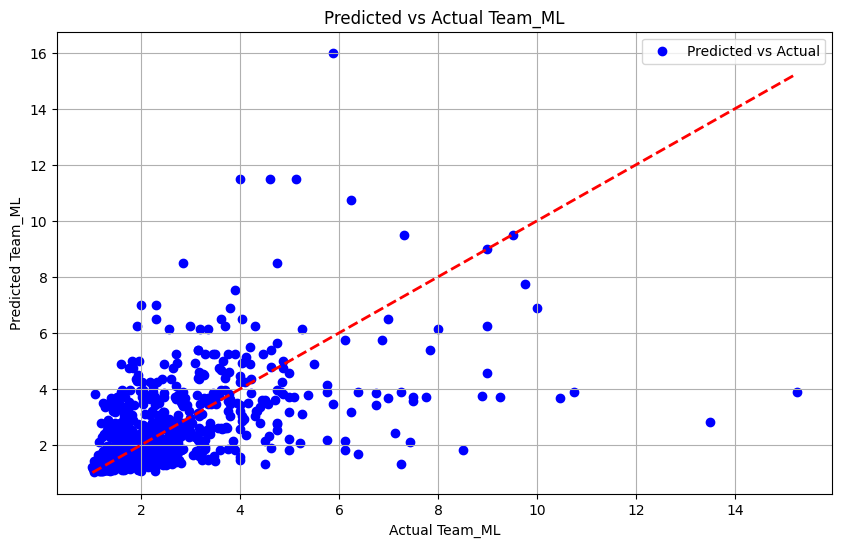

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Predicted vs Actual Team_ML')
plt.legend()
plt.grid(True)
plt.show()

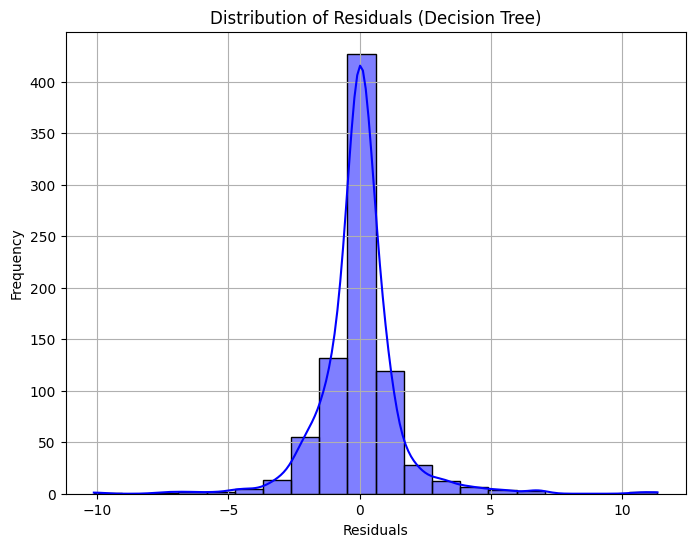

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Decision Tree)')
plt.grid(True)
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8', 'Opponent_Wins_Last_8', 'Opponent_Defensive_Rating_Last_8', 'Opponent_Offensive_Rating_Last_8'   ]]
y = GData['Team_ML']



# Convert 'Home_Away' to numeric
X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

Mean Squared Error: 1.3160039177287508
Mean Absolute Error: 0.6749110675633031
R-squared: 0.4982017441202129


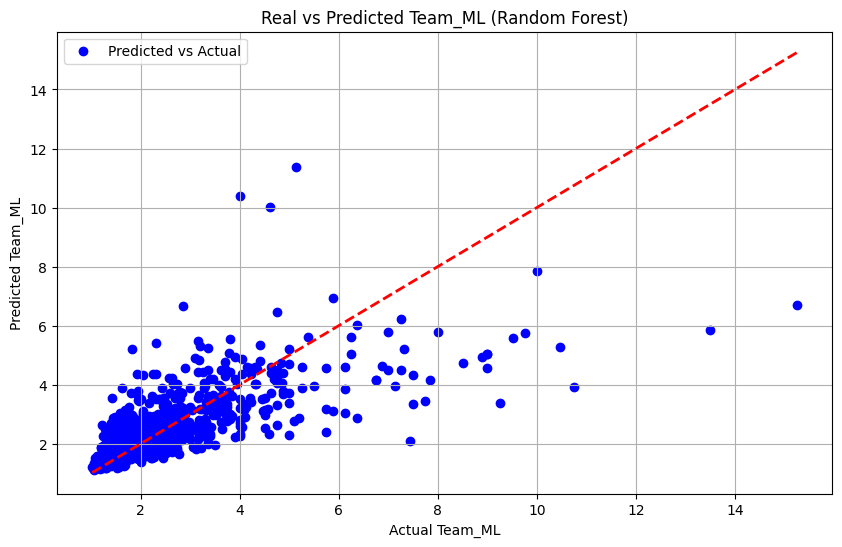

In [ ]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8', 'Opponent_Wins_Last_8', 'Opponent_Defensive_Rating_Last_8', 'Opponent_Offensive_Rating_Last_8'   ]]
y = GData['Team_ML']

X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

Mean Squared Error: 1.461683663555039
Mean Absolute Error: 0.7308772384927332
R-squared: 0.4426533970462876


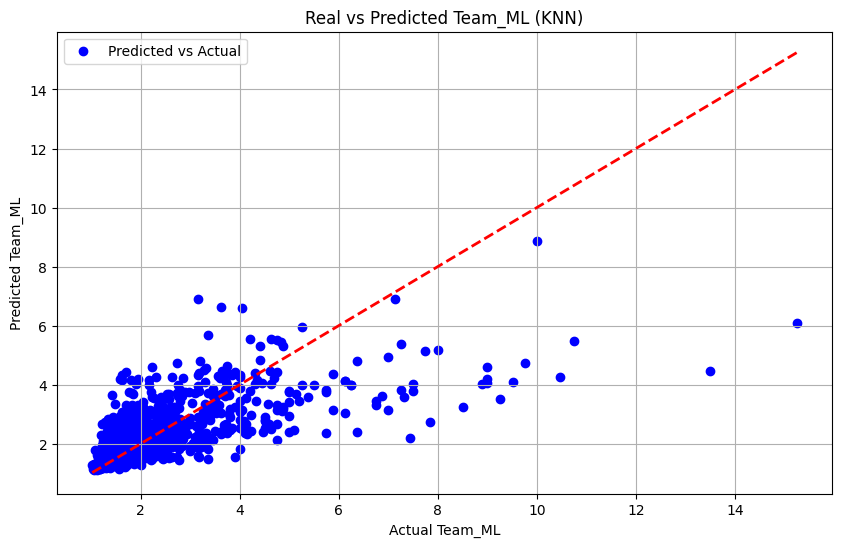

In [ ]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (KNN)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Convert all variables to float64
GData['Wins_Last_8'] = GData['Wins_Last_8'].astype('float64')
# GData['Wins_Last_16'] = GData['Wins_Last_16'].astype('float64')

GData['Offensive_Rating_Last_8'] = GData['Offensive_Rating_Last_8'].astype('float64')
GData['Defensive_Rating_Last_8'] = GData['Defensive_Rating_Last_8'].astype('float64')
GData['Opponent_Offensive_Rating_Last_8'] = GData['Opponent_Offensive_Rating_Last_8'].astype('float64')
GData['Opponent_Defensive_Rating_Last_8'] = GData['Opponent_Defensive_Rating_Last_8'].astype('float64')



GData['sentiment_past_week'] = GData['sentiment_past_week'].astype('float64')


GData['Home_Away'] = GData['Home_Away'].replace({'Home': 1, 'Away': 0}).astype(float)







X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8', 'Opponent_Wins_Last_8','Opponent_Defensive_Rating_Last_8', 'Opponent_Offensive_Rating_Last_8'   ]]
y = GData['Team_ML']









X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#Neural Network

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),  # 4 input features
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test_scaled).ravel()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

26/26 [==============================] - 0s 2ms/step
Mean Squared Error: 1.1537407538368714
Mean Absolute Error: 0.6857977464338527
Root Mean Squared Error: 1.0741232489043664
R-squared: 0.5600734236323888


#Neural Network 2

In [ ]:
from keras.layers import Dropout
from keras import regularizers


model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model with mean squared error loss and L2 regularization
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test).ravel()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

26/26 [==============================] - 0s 3ms/step
Mean Squared Error: 1.1065322820945152
Root Mean Squared Error: 1.0519183818597881
Mean Absolute Error: 0.6050298401970949
R-squared: 0.5780742277819302


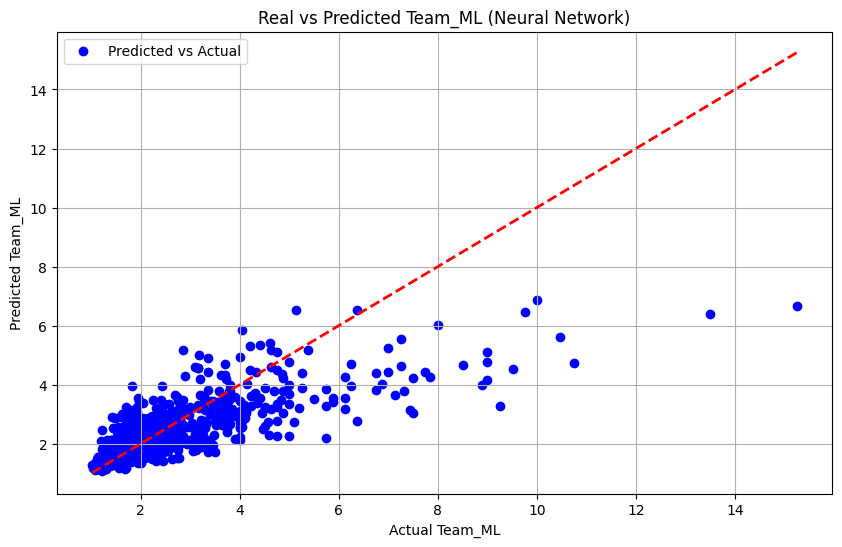

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        return self

    def predict(self, X):
        return np.ravel(self.model.predict(X))

# Wrap the neural network model
keras_regressor = KerasRegressor(model)


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor




#Gradient Boost (from)

In [ ]:
X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8', 'Opponent_Wins_Last_8', 'Opponent_Defensive_Rating_Last_8', 'Opponent_Offensive_Rating_Last_8'   ]]
y= GData['Team_ML']



X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.6,random_state=42)

G= GradientBoostingRegressor(random_state=0)

G.fit(X_train, y_train)

Pred= G.predict(X_test)

r_squared = r2_score(y_test, Pred)
print("R-squared:", r_squared)

mae = mean_absolute_error(y_test, Pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, Pred)
print("Mean Squared Error:", mse)




R-squared: 0.47249605657486626
Mean Absolute Error: 0.6572668095377303
Mean Squared Error: 1.16603575839339


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regression = LinearRegression()


linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 1.4712888413204988
Mean Absolute Error: 0.7368045905874328
R-squared: 0.49689497813103267


#Ensemble


In [ ]:
ensemble_model = VotingRegressor([('decision_tree', tree_regressor),
                                  ('knn', knn_regressor),
                                  ('random_forest', rf_regressor),
                                  ('neural_network', keras_regressor),
                                  ('Gradient Boost', G),
                                  ('Linear Regression', linear_regression)

                                  ])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

17/17 [==============================] - 0s 2ms/step
Mean Squared Error: 1.267477068257949
Mean Absolute Error: 0.65258689224856
R-squared: 0.5665881095298662


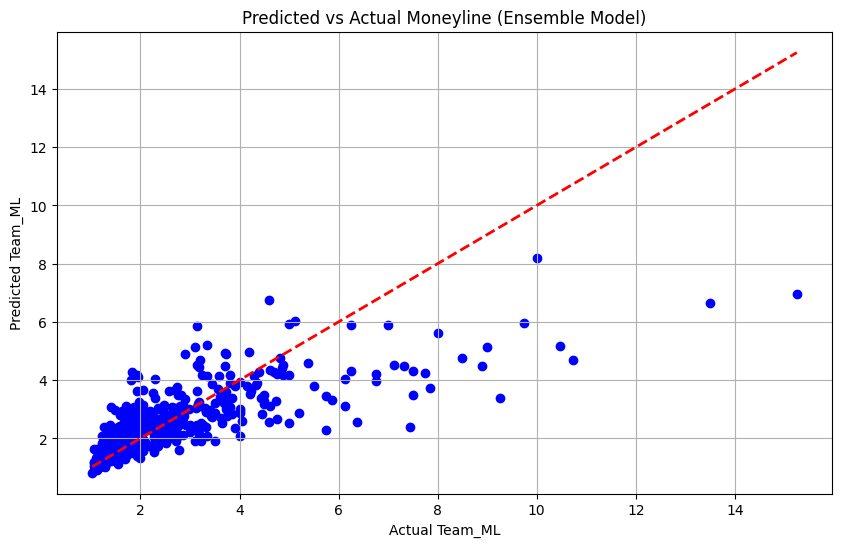

In [ ]:
#plot predicted vs actual from the ensemble model

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Predicted vs Actual Moneyline (Ensemble Model)')
plt.grid(True)
plt.show()


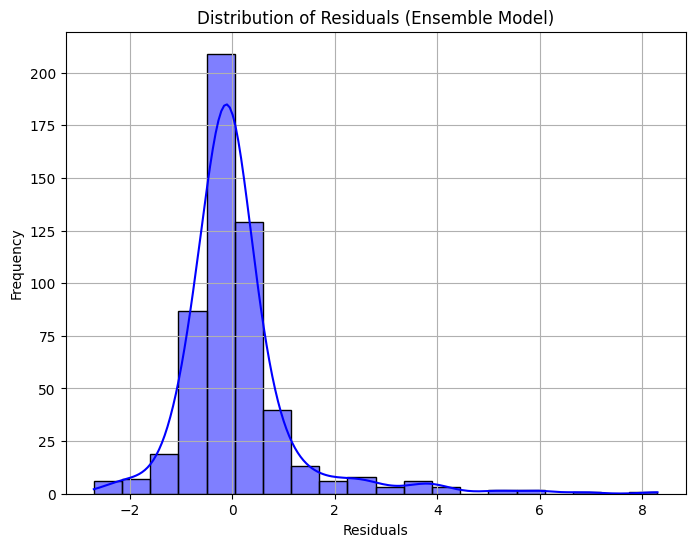

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ensemble Model)')
plt.grid(True)
plt.show()

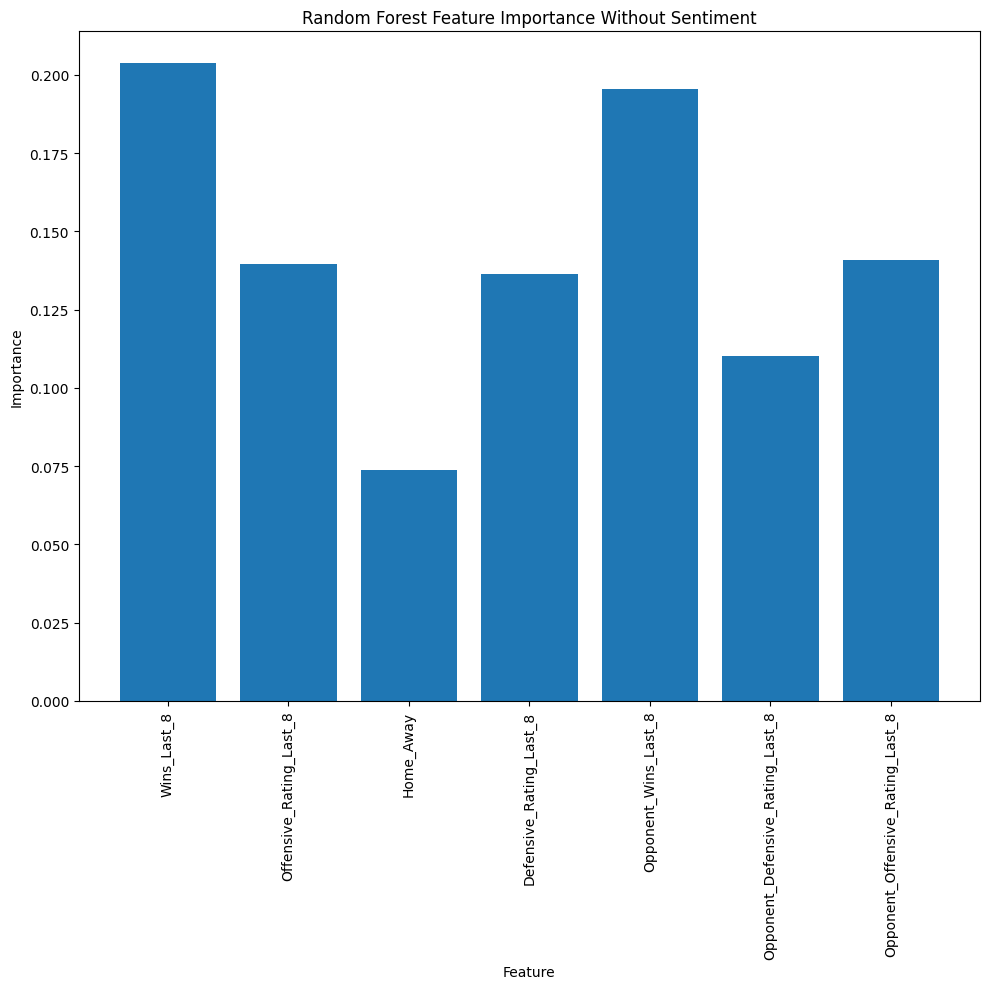

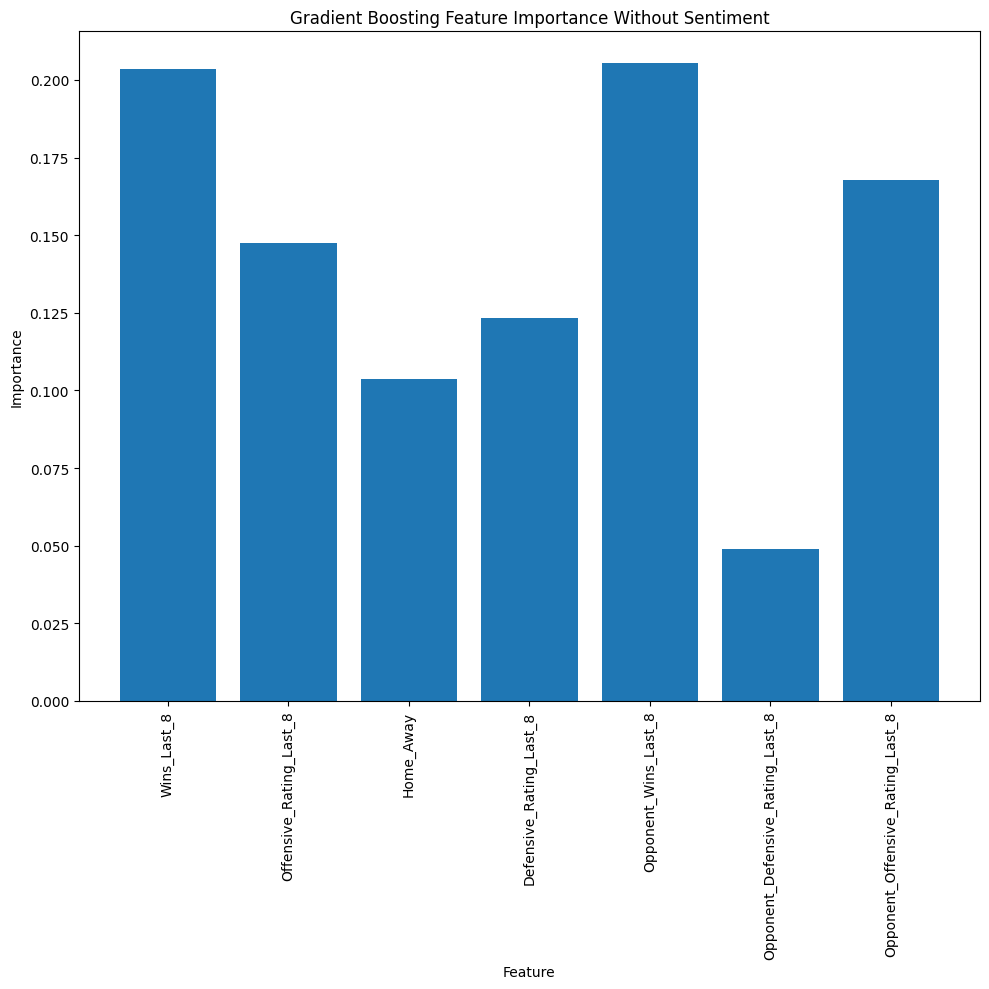

In [ ]:
# Feature importance from Random Forest
rf_feature_importance = ensemble_model.named_estimators_['random_forest'].feature_importances_

# Feature importance from Gradient Boosting
gb_feature_importance = ensemble_model.named_estimators_['Gradient Boost'].feature_importances_

plt.figure(figsize=(10, 10))
plt.bar(range(len(rf_feature_importance)), rf_feature_importance, align='center')
plt.xticks(range(len(rf_feature_importance)), X_train.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance Without Sentiment')

plt.tight_layout()

plt.savefig('for_importance_wo_sent.png')

plt.show()


plt.figure(figsize=(10, 10))
plt.bar(range(len(gb_feature_importance)), gb_feature_importance, align='center')
plt.xticks(range(len(gb_feature_importance)), X_train.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boosting Feature Importance Without Sentiment')

plt.tight_layout()

plt.savefig('grad_importance_wo_sent.png')


plt.show()



17/17 [==============================] - 0s 2ms/step


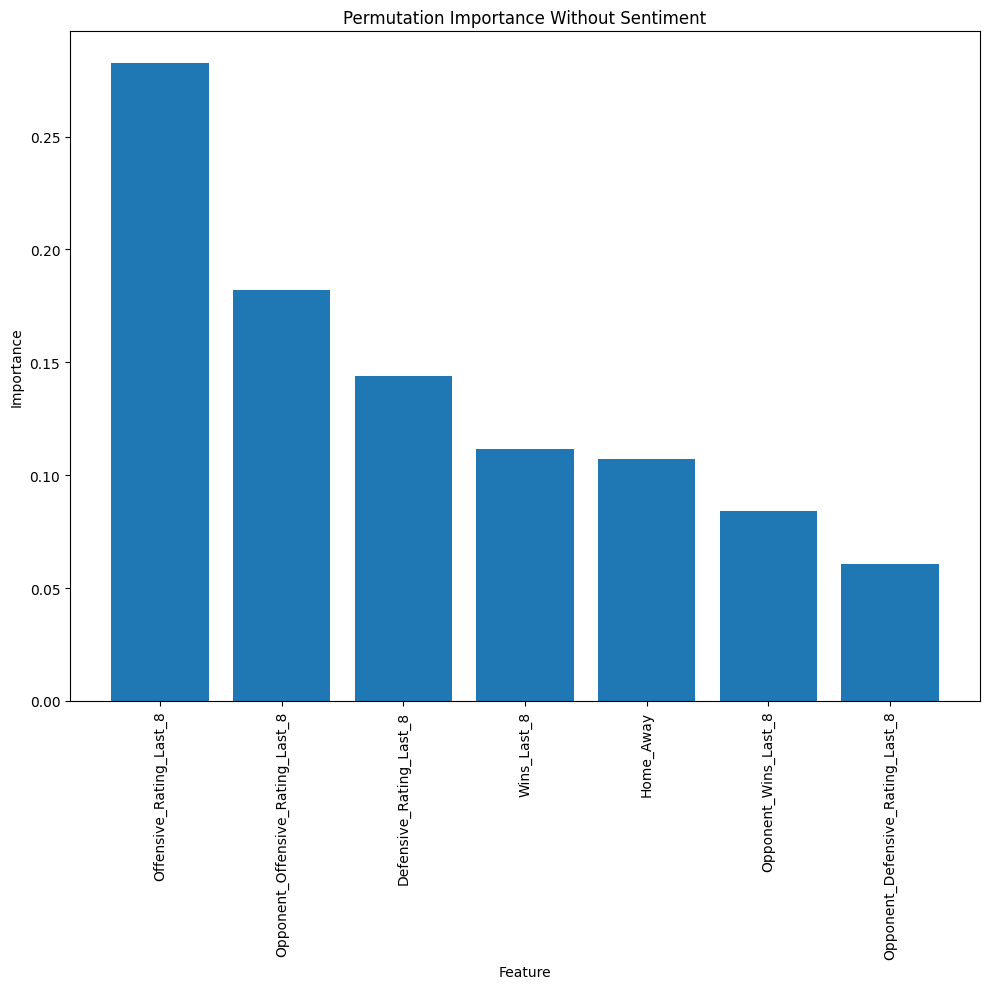

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(ensemble_model, X_test, y_test, n_repeats=10, random_state=42)



# Get the mean importance of each feature
perm_importance = result.importances_mean

sorted_indices = np.argsort(perm_importance)[::-1]

sorted_feature_names = np.array(X_train.columns)[sorted_indices]

sorted_perm_importance = perm_importance[sorted_indices]

plt.figure(figsize=(10, 10))
plt.bar(range(len(sorted_perm_importance)), sorted_perm_importance, align='center')
plt.xticks(range(len(sorted_perm_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Importance Without Sentiment')

plt.tight_layout()

plt.savefig('perm_importance_wo_sent.png')


plt.show()